##Getting the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
# Create the Train, Validation and Testing Folder
import os
import random
import shutil

# Define source and destination directories
source_dir = "/content/drive/MyDrive/dataset/data"
base_dir = "/content/dataset"

# Define the classes (folders) we want to work with
classes = ["with_mask", "without_mask"]

# Define the number of samples for each split
train_samples = 500
val_samples = 100
test_samples = 50

# Create target directories for training, validation, and testing
os.makedirs(os.path.join(base_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "validation"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "test"), exist_ok=True)


In [ ]:
# Create the classes folders inside of each folder you created above

for split in ["train", "validation", "test"]:
    for class_name in classes:
        os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)


In [ ]:
#For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
# Function to randomly sample and move images
def sample_and_move_images(class_name, num_samples, split):
    source_path = os.path.join(source_dir, class_name)
    dest_path = os.path.join(base_dir, split, class_name)

    # Get a list of all image files in the class folder
    all_images = os.listdir(source_path)

    # Randomly sample num_samples images
    selected_images = random.sample(all_images, num_samples)

    # Move the selected images to the destination folder
    for image in selected_images:
        shutil.move(os.path.join(source_path, image), os.path.join(dest_path, image))

# Sample images for each class and split
for class_name in classes:
    sample_and_move_images(class_name, train_samples, "train")
    sample_and_move_images(class_name, val_samples, "validation")
    sample_and_move_images(class_name, test_samples, "test")

print("Dataset organization and sampling complete.")

Dataset organization and sampling complete.


##Inspecting the Dataset

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
# Define the base directory where your data is organized
base_dir = "/content/dataset"

# Define the paths for training, validation, and testing data
training_path = os.path.join(base_dir, "train")
validation_path = os.path.join(base_dir, "validation")
testing_path = os.path.join(base_dir, "test")


In [ ]:
#code that counts the number of images that we have in our training directory for each of the 2 categories: with_mask and without_mask
# Define the path to the training directory

training_path = "/content/dataset/train"

# Define the categories (classes)
categories = ["with_mask", "without_mask"]

# Create a dictionary to store the count of images in each category
image_count = {}

# Loop through each category and count the images
for category in categories:
    category_path = os.path.join(training_path, category)
    num_images = len(os.listdir(category_path))
    image_count[category] = num_images

# Print the counts
for category, count in image_count.items():
    print(f"Category '{category}': {count} images")


Category 'with_mask': 500 images
Category 'without_mask': 500 images


In [ ]:
#same for the validation and the testing folders
# Define the path to the validation directory
validation_path = "/content/dataset/validation"

# Define the categories (classes)
categories = ["with_mask", "without_mask"]

# Create a dictionary to store the count of images in each category
image_count = {}

# Loop through each category and count the images
for category in categories:
    category_path = os.path.join(validation_path, category)
    num_images = len(os.listdir(category_path))
    image_count[category] = num_images

# Print the counts
for category, count in image_count.items():
    print(f"Category '{category}' in Validation: {count} images")


Category 'with_mask' in Validation: 100 images
Category 'without_mask' in Validation: 100 images


In [ ]:

# Define the path to the testing directory
testing_path = "/content/dataset/test"

# Define the categories (classes)
categories = ["with_mask", "without_mask"]

# Create a dictionary to store the count of images in each category
image_count = {}

# Loop through each category and count the images
for category in categories:
    category_path = os.path.join(testing_path, category)
    num_images = len(os.listdir(category_path))
    image_count[category] = num_images

# Print the counts
for category, count in image_count.items():
    print(f"Category '{category}' in Testing: {count} images")



Category 'with_mask' in Testing: 50 images
Category 'without_mask' in Testing: 50 images


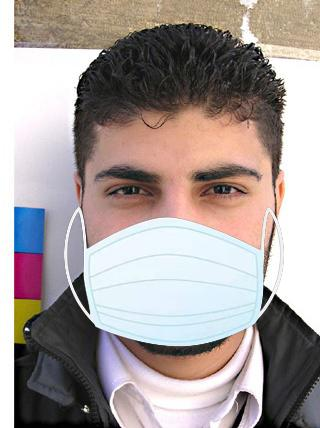

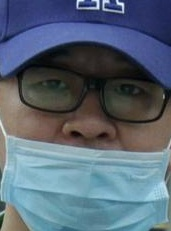

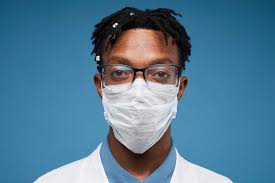

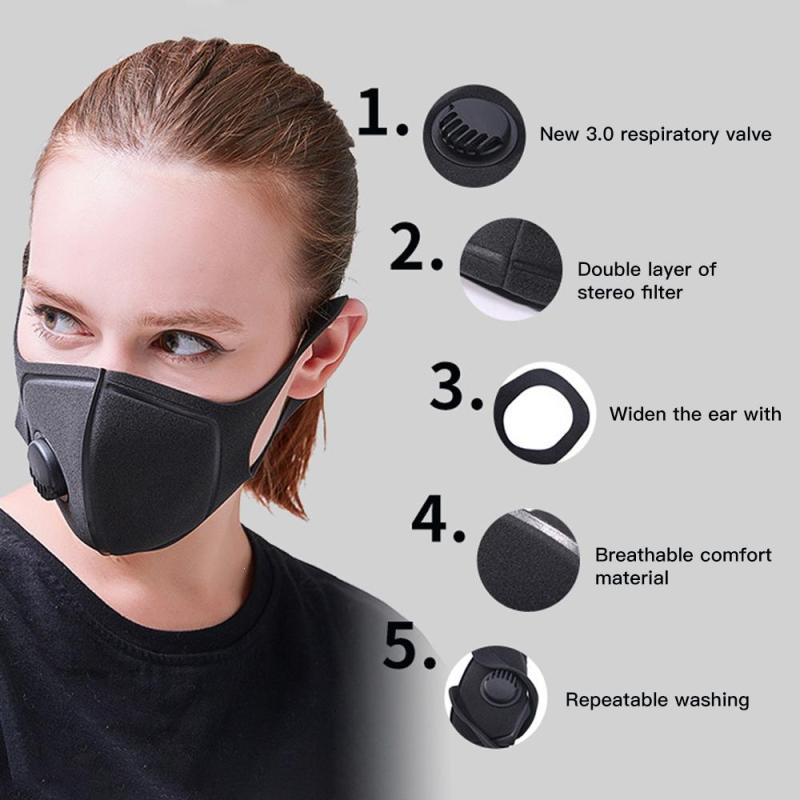

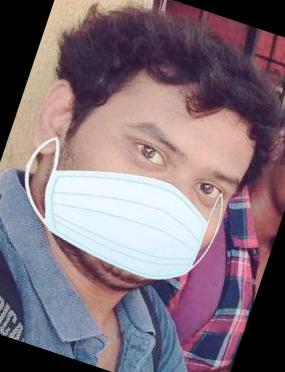

In [ ]:
#code that shows 5 random images for people with mask from our training set
import random
from IPython.display import Image, display

# Define the path to the training directory
training_path = "/content/dataset/train/with_mask"

# Get a list of all image files in the training/with_mask directory
image_files = os.listdir(training_path)

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Display the selected random images
for image_file in random_images:
    image_path = os.path.join(training_path, image_file)
    display(Image(filename=image_path))


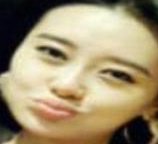

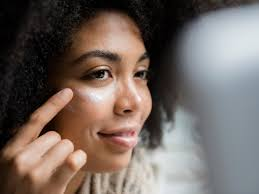

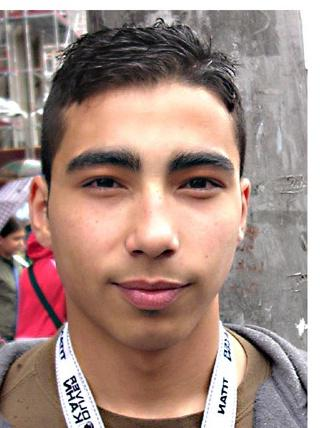

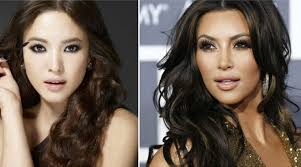

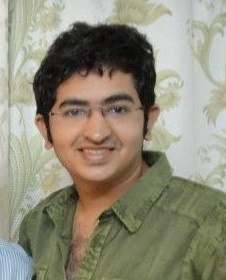

In [ ]:
#code that shows 5 random images for people without mask from our training set
training_path = "/content/dataset/train/without_mask"

# Get a list of all image files in the training/without_mask directory
image_files = os.listdir(training_path)

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Display the selected random images
for image_file in random_images:
    image_path = os.path.join(training_path, image_file)
    display(Image(filename=image_path))

##Modeling

In [ ]:
#Define a model structure that can deal with the images that we have to classify them between the 2 classes.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
#Train the model that we defined on the training data and evaluate it on the validation data. then tune the hyperparameters of our model until we reach a satisfying result on the validation set.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to training and validation data
train_dir = "/content/dataset/train"
validation_dir = "/content/dataset/validation"

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)

# Print the validation accuracy
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))

# Save the training history for plotting
np.save("model_history.npy", history.history)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
31/31 [==============================] - 45s 1s/step - loss: 0.7157 - accuracy: 0.6581 - val_loss: 0.6424 - val_accuracy: 0.6667
Epoch 2/20
31/31 [==============================] - 42s 1s/step - loss: 0.4672 - accuracy: 0.7882 - val_loss: 0.3084 - val_accuracy: 0.8750
Epoch 3/20
31/31 [==============================] - 44s 1s/step - loss: 0.4244 - accuracy: 0.8192 - val_loss: 0.3400 - val_accuracy: 0.9010
Epoch 4/20
31/31 [==============================] - 42s 1s/step - loss: 0.3948 - accuracy: 0.8368 - val_loss: 0.2630 - val_accuracy: 0.9115
Epoch 5/20
31/31 [==============================] - 42s 1s/step - loss: 0.3761 - accuracy: 0.8605 - val_loss: 0.2859 - val_accuracy: 0.9062
Epoch 6/20
31/31 [==============================] - 43s 1s/step - loss: 0.3678 - accuracy: 0.8554 - val_loss: 0.2916 - val_accuracy: 0.8802
Epoch 7/20
31/31 [==============================] - 42s 1s/step - loss: 0.379

The model is not overfitting.


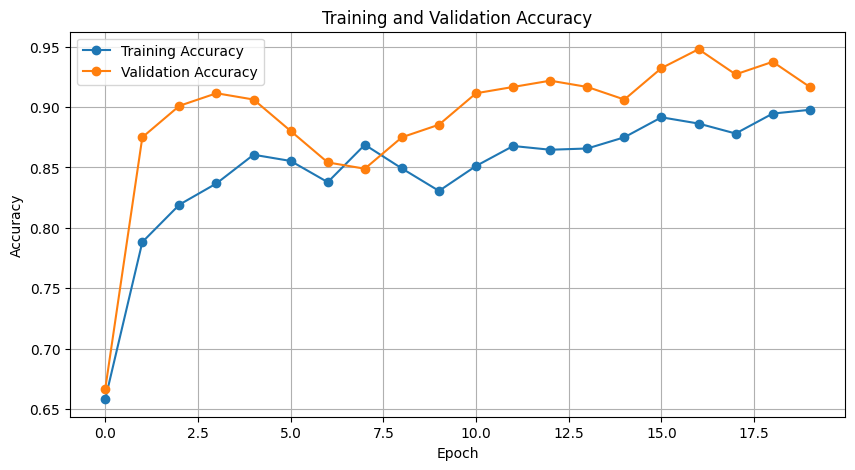

In [ ]:
#Plot the accuracy curve and see if our model is overfit.
import numpy as np
import matplotlib.pyplot as plt

# Load the saved training history
history = np.load("model_history.npy", allow_pickle=True).item()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Check if the model is overfitting
if np.argmax(history['val_accuracy']) == np.argmin(history['val_loss']):
    print("The model might be overfitting.")
else:
    print("The model is not overfitting.")

plt.show()


##Evaluate the model


In [ ]:
#Now we will evaluate the model that we built on the testing set that we kept aside since the beginning.
# Define the path to the testing directory
testing_dir = "/content/dataset/test"

# Create a data generator for testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary' ,
    shuffle=False
)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Found 100 images belonging to 2 classes.
4/4 [==============================] - 2s 355ms/step - loss: 0.2807 - accuracy: 0.8700
Test Accuracy: 87.00%


4/4 [==============================] - 2s 244ms/step


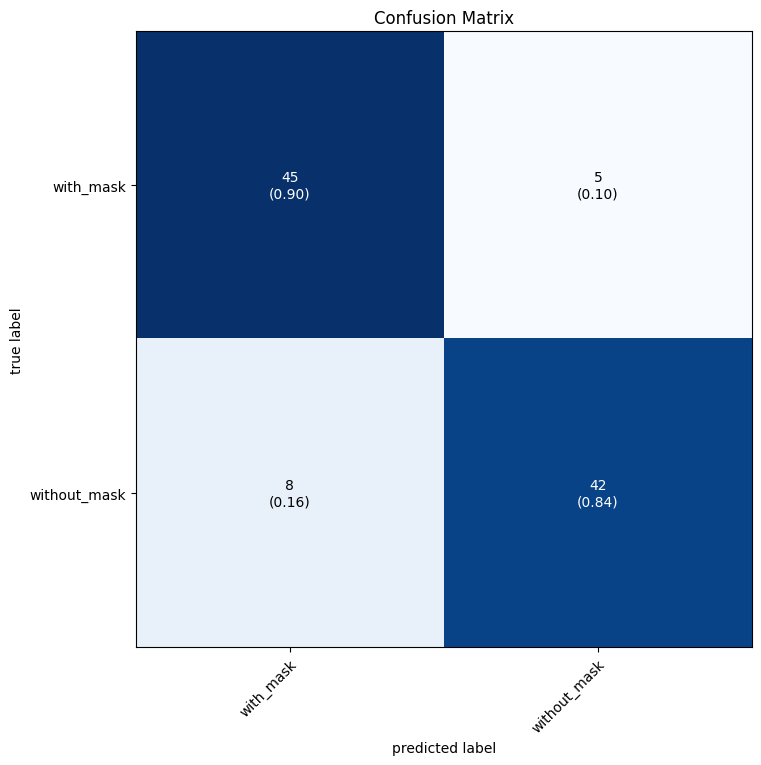

              precision    recall  f1-score   support

   with_mask       0.85      0.90      0.87        50
without_mask       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [ ]:
#Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Generate predictions for the testing data
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

# Get true labels from the testing data generator
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, test_predictions)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(8, 8),
                                class_names=['with_mask', 'without_mask'],
                                show_normed=True)
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(true_labels, test_predictions, target_names=['with_mask', 'without_mask']))
